In [2]:
import matplotlib.pyplot as plt

%matplotlib inline
import networkx as nx
import numpy as np
import random as rd


# Centrality measures 

Centrality measures are quantities to descibe nodes of a network beyond their degrees. In fact, the degree is only one out of several centrality measures.

We will learn about two more in this notebook.

As an example dataset we will look at the e-mail network of Enron executives.
A node denotes a person and an edge connects two of them when they had e-mail contact.
For simplicity there are no directions nor weights on the edges.


In [ ]:
# for local storage
path = '/Users/my_home/my_data/data/'

G = nx.read_edgelist(path + 'email.edges', nodetype=int)

In [ ]:
# for colab env
from google.colab import drive

drive.mount('/content/gdrive')
path = '/content/'

G = nx.read_edgelist(path + 'email.edges', nodetype=int)    

In [6]:
path = '/Users/fmueller/work/Teaching/Network_course/notebooks4git/data/ia-enron-only/'
G = nx.read_edgelist(path + 'ia-enron-only.edges', nodetype=int)
print(nx.info(G))
# nx.draw(G)

Name: 
Type: Graph
Number of nodes: 143
Number of edges: 623
Average degree:   8.7133


## 1. Visualizing: node size by degree

Here is a little example on how to encode the degree of a node by the node size

(-0.7409926033549246,
 1.089673525939579,
 -0.6720509522287271,
 0.7208926138782186)

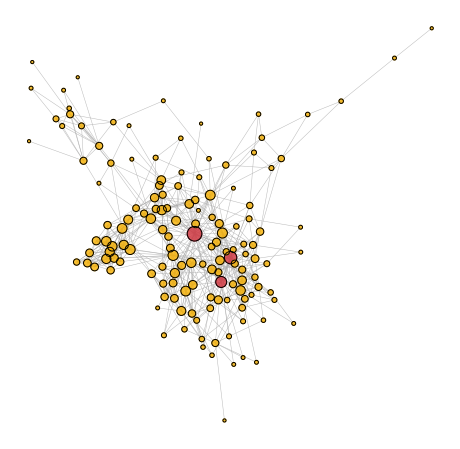

In [12]:
# sort nodes in the network by degree
hubs = [node for node, _ in sorted(dict(G.degree()).items(), key = lambda x: x[1], reverse = True)]

# give nodes 2-dim coordinates
posG = nx.spring_layout(G,iterations=100)

plt.figure(figsize=(8,8))
# draw edges only
nx.draw_networkx_edges(G, pos=posG, width=.5,edge_color='#aaaaaa',alpha=.8)


scalef = 5
kpower = 1
l_x = []
l_y = []
l_size = []
l_color = []
for node in G.nodes():
    k = nx.degree(G,node)
    # map degree to node size
    R = scalef*(1+k**kpower)
    l_size.append(R)
    l_x.append(posG[node][0])
    l_y.append(posG[node][1])
    if node in hubs[:3]: # give different color to the three most connected nodes
        l_color.append('#d2323c')
    else:
        l_color.append('#f8b100')

plt.scatter(l_x,l_y,s=l_size,c = l_color,zorder=1,alpha=.8)
plt.scatter(l_x,l_y,s=l_size,facecolors='none',edgecolors='k',zorder=2)

plt.axis('off')


## 2. centrality measures

In the following we will focus on the three most popular centrality measures

o degree

o betweeness

o closeness

Please find out yourself what betweeness- and closeness centrality mean.

Note that there are even more centrality measures. We will ignore them for now...

In [13]:
# 
highest_degree_node = max(G.nodes, key=G.degree)
print('highest degree node: %s with k = %s' %(highest_degree_node,G.degree(highest_degree_node)))


highest degree node: 105 with k = 42


In [14]:
betweenness = nx.centrality.betweenness_centrality(G)
highest_betweenness_node = max(G.nodes, key=betweenness.get)
print('highest betweeness node: %s with btw = %.4f' %(highest_betweenness_node,betweenness[highest_betweenness_node]))


highest betweeness node: 105 with btw = 0.1940


In [15]:
closeness = nx.centrality.closeness_centrality(G)
highest_closeness_node = max(G.nodes, key=closeness.get)
print('highest closeness node: %s with cls = %.4f' %(highest_closeness_node,closeness[highest_betweenness_node]))


highest closeness node: 105 with cls = 0.5000


---
## Exercise 1 (9 pts)

Consider the e-mail network and generate a dictionary of nodes and a centrality measure ranked by

>(i)  betweeness centrality and closeness centrality. Print out the 5 most central nodes ordered by both, betweeness and closeness. (2pts)

>(ii) Generate two more network diagrams showing the three most central nodes by betweeness and closeness, respectively. Compare with the diagram from above that highlight the degrees. 
(Hint: For comparability use the same x,y coordinates for all three diagrams) (2pts)

>(iii) Given the ordering of nodes by degree, identify the ranks for which nodes by betweeness and closeness deviates from that order. (2pts)

>(iv) Generate and compare the distributions for all three centrality measures for this particular Email-network. Evaluate their comparability in one or two sentences. (3pts)

---
## 1. Small-World Model

This is the algorithm for generating a small-world network:

1. Begin with a ring of $N$ nodes
2. Connect each node to its $k$ nearest neighbors (or $k-1$ if k is odd).
3. For each edge $(u, v)$, with probability $p$, replace edge $(u, v)$ with $(u, w)$ where $w$ is not a neighbor of $u$.

We'll do these step-by-step first, and combine them into a function last.

### Create a ring of N nodes

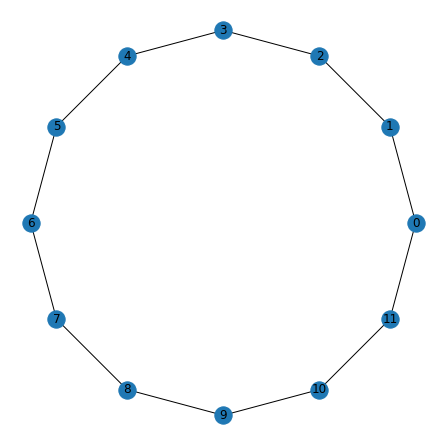

In [26]:
N = 12
G = nx.cycle_graph(N)
plt.figure(figsize=(6,6))
nx.draw_circular(G, with_labels=True)

### Connect each node to its $k$ nearest neighbors

Let's say $k$ is 4. So for node $n$ we want to add edges to $n$'s 4 nearest neighbors: $n-1, n+1, n-2,$ and $n+2.$ Since our nodes are in a circle, these can "wrap around", *e.g.* the 4 nearest neighbors of node 0 are N-1, 1, N-2, and 2.


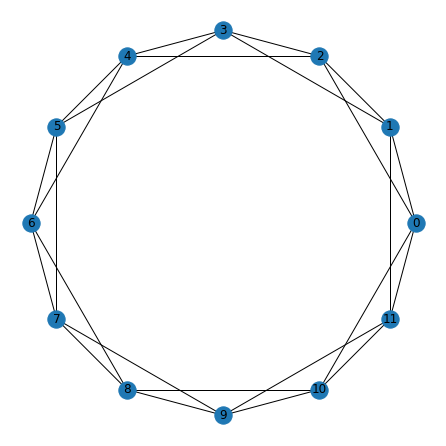

In [27]:
N = 12
G = nx.cycle_graph(N)

k = 4

for n in G.nodes:
    for i in range(1, k // 2 + 1):
        left  = (n-i) % N
        right = (n+i) % N 
        G.add_edge(n, left)
        G.add_edge(n, right)

plt.figure(figsize=(6,6))
nx.draw_circular(G, with_labels=True)

### Rewire some edges

> For each edge $(u, v)$, with probability $p$, replace edge $(u, v)$ with (u, w) where $w$ is not a neighbor of $u$.

For this step, we generate a list of nodes that are not neighbors of $u$, and `random.choice` to select $w$ at random from that set of "not neighbors."

disconnect edge 3-5 from 5
and connect it randomly to 6


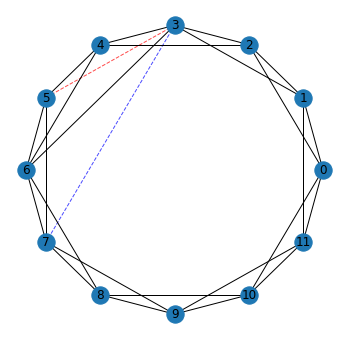

In [34]:
plt.figure(figsize=(6,6))

N = 12
G = nx.cycle_graph(N)
k = 4
for n in G.nodes:
    for i in range(1, k // 2 + 1):
        left  = (n-i) % N
        right = (n+i) % N 
        G.add_edge(n, left)
        G.add_edge(n, right)

pos = nx.circular_layout(G)

# random rewiring start here
p = 0.1

for u, v in list(G.edges):
    if rd.random() < p:
        nx.draw_networkx_edges(G, pos = pos, edgelist=[(u,v)],style = 'dashed',edge_color = 'r',alpha = 0.7)
        nx.draw_networkx_edges(G, pos = pos, edgelist=[(u,w)],style = 'dashed',edge_color = 'b',alpha = 0.7)

        not_neighbors = set(G.nodes) - set(G.neighbors(u)) - {u}
        # randomly choosing a node to connect to
        w = rd.choice(list(not_neighbors))
        G.remove_edge(u, v)
        G.add_edge(u, w)
        print('disconnect edge %s-%s from %s' %(u,v,v))
        print('and connect it randomly to %s' %w)

nx.draw_circular(G, with_labels=True)


Note, that this is done randomly so there is always a non-zero probablity that nothing happens at all. 
Just try a couple of times.

The dashed red edge(s) is/are rewrired into the blue dashed edge(s). 

Now, that you know how it works it can be revealed that there is a networkx module for that:

[watts_strogatz_graph()](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.random_graphs.watts_strogatz_graph.html).

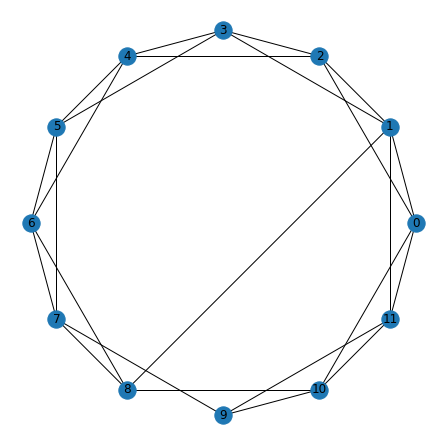

In [44]:
G_wattsstrogatz = nx.watts_strogatz_graph(n=12,k=4,p=0.1)
plt.figure(figsize=(6,6))
nx.draw_circular(G_wattsstrogatz, with_labels=True)


# Exercise   (7 pts)
Watts-Strogatz network 

(i)
Generate Watts-Strogatz networks with 100 nodes using the `networkx` function.

Iterate over the range of the rewiring probabilty $ p \in [0,1]$ (use reasonable many steps in between) and 
compute the average shortest path lengths for these networks. Do that for two mean degree parameters $k=4$ and $k = 8$.

Plot both results in one figure with a legend and a logarithmic x-axis. (give both curves $k=4$ and $k = 8$ an individual color)

Discuss briefly the small-world effect based on the produced figure.

(4pts)

(ii)
Watts-Strogatz networks converge to Erdös-Rényi networks for $p\rightarrow1$. 
Estimate the asymptotic value of the average shortest path length for $p\rightarrow1$ and show graphically that it goes to $$\langle l \rangle \approx \frac{\log{N}}{\log{\langle k \rangle}}.$$

(3pts)
